In [52]:
import numpy as np
import pickle
import json
from scipy import sparse
import os
import matplotlib.pyplot as plt

In [53]:
clustering_results_path = './sigma-girl-MIIRL/data_starcraft/results_100_3.pkl'
clustering_results = pickle.load(open(clustering_results_path, "rb"))

In [54]:
clustering_results[0][1]

array([[0.51800279, 0.48199721],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.87272076, 0.12727924]])

In [55]:
actions = pickle.load(open('./MSC/exported_replays/actions_TerranVsTerran_100_150_3.pkl', 'rb'))
states = pickle.load(open('./MSC/exported_replays/states_TerranVsTerran_100_150_[16:26].pkl', 'rb'))
rewards = pickle.load(open('./MSC/exported_replays/rewards_TerranVsTerran_100_150_[ 20  21 -22].pkl', 'rb'))

In [56]:
macro_action_space = ['Build', 'TrainWorker', 'TrainArmy', 'None']

terran_stat = json.load(open('./MSC/parsed_replays/Stat/Terran.json'))
id_reversed = {value: key for (key, value) in terran_stat['action_id'].items()}

In [57]:
dir_path = './MSC/parsed_replays/GlobalFeatureVector/Terran_vs_Terran/Terran'
num_replays = 100
paths = os.listdir(dir_path)
raw_data = {}
for i in range(num_replays):
    index = str(i)
    data = np.asarray(sparse.load_npz(os.path.join(dir_path,paths[i])).todense())
    raw_data[index] = data

In [58]:
num_clusters =  len(clustering_results[0][0])
num_clusters
cluster_names = ["cluster " + str(i) for i in range(num_clusters)]

In [75]:
num_clusters
clustering_results[0]

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0.],
        [1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
         0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
         0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
         1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
         0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
         0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
         1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,

In [60]:
# get cluster assignments
cluster_assignments = [0] * num_replays
for i in range(num_replays):
    cluster_probs = clustering_results[0][0][:, i]
    cluster_assignments[i] = np.argmax(cluster_probs)

In [61]:
# testing
#cluster_assignments

In [62]:
# compute cluster win/loss distributions
outcome_distributions = [[] for i in range(num_clusters)]
overall_distribution = []
for i in range(num_replays):
    index = str(i)
    outcome = str(raw_data[index][0][0])
    overall_distribution.append(outcome)
    outcome_distributions[cluster_assignments[i]].append(outcome)

Text(0.5, 1.0, 'Win/Loss Count')

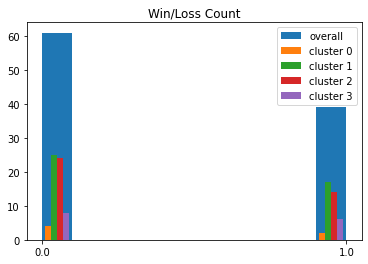

In [63]:
# visualize distributions
fig, ax = plt.subplots()
ax.hist(overall_distribution, label='overall')
ax.hist(outcome_distributions, label=cluster_names)
ax.legend()
ax.set_title("Win/Loss Count")

Text(0.5, 1.0, 'Cumulative Score at end of 150 frames')

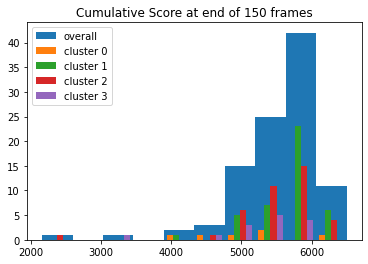

In [64]:
# compute score distributions
number_frames = 150
score_distributions = [[] for i in range(num_clusters)]
for i in range(num_replays):
    index = str(i)
    cumulative_score = raw_data[index][number_frames - 1][2]
    score_distributions[cluster_assignments[i]].append(cumulative_score)

fig, ax = plt.subplots()
ax.hist(np.hstack(np.array(score_distributions)), label='overall')
ax.hist(score_distributions, label=cluster_names)
ax.legend()
ax.set_title("Cumulative Score at end of {} frames".format(number_frames))

Text(0.5, 1.0, 'Average  worker supply count per frame')

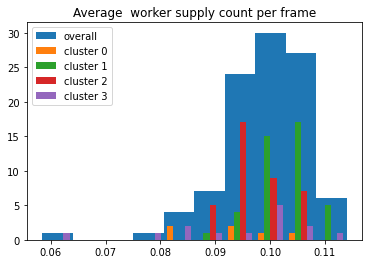

In [65]:
# make average worker supply and average army supply distributions
# army index = 4, worker index = 5

worker_distributions = [ [] for i in range(num_clusters)]
for i in range(num_replays):
    index = str(i)
    worker_distributions[cluster_assignments[i]].append(states[str(i)][:, 5].mean())

fig, ax = plt.subplots()
ax.hist(np.hstack(np.array(worker_distributions)), label='overall')
ax.hist(worker_distributions, label=cluster_names)
ax.legend()
ax.set_title("Average  worker supply count per frame")

Text(0.5, 1.0, 'Average standardized worker supply count per frame')

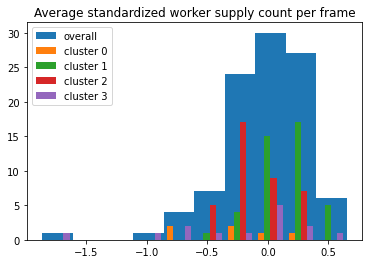

In [66]:
# make average worker supply and average army supply distributions
# army index = 4, worker index = 5

worker_distributions = [ [] for i in range(num_clusters)]
for i in range(num_replays):
    index = str(i)
    worker_distributions[cluster_assignments[i]].append(rewards[str(i)][:, 1].mean())

fig, ax = plt.subplots()
ax.hist(np.hstack(np.array(worker_distributions)), label='overall')
ax.hist(worker_distributions, label=cluster_names)
ax.legend()
ax.set_title("Average standardized worker supply count per frame")

Text(0.5, 1.0, 'Average (normalized) army supply count per frame')

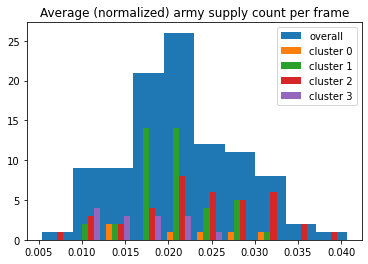

In [67]:
# make average worker supply and average army supply distributions
# army index = 4, worker index = 5

army_distributions = [ [] for i in range(num_clusters)]
for i in range(num_replays):
    index = str(i)
    army_distributions[cluster_assignments[i]].append(states[str(i)][:, 4].mean())

fig, ax = plt.subplots()
ax.hist(np.hstack(np.array(army_distributions)), label='overall')
ax.hist(army_distributions, label=cluster_names)
ax.legend()
ax.set_title("Average (normalized) army supply count per frame")

In [68]:
clustering_results[0][1]

array([[0.51800279, 0.48199721],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.87272076, 0.12727924]])

In [69]:
np.mean(army_distributions[0])

0.023073440939704884

In [70]:
np.mean(army_distributions[2])

0.023803975501633264

In [71]:
np.mean(worker_distributions[0])

-0.27505986930260645

In [72]:
np.mean(worker_distributions[1])

0.16582337392700713

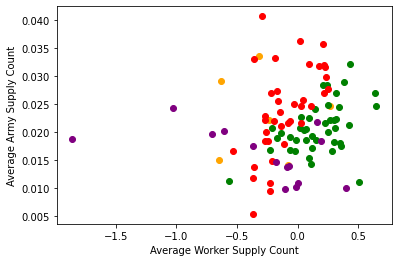

In [73]:
fig, ax = plt.subplots()
colors = ['orange', 'green', 'red', 'purple']
for i in range(num_clusters):
    ax.scatter(worker_distributions[i],army_distributions[i], c=colors[i])
#ax.scatter(np.hstack(np.array(army_distributions)), np.hstack(np.array(worker_distributions)))
plt.xlabel("Average Worker Supply Count")
plt.ylabel("Average Army Supply Count")
plt.show()

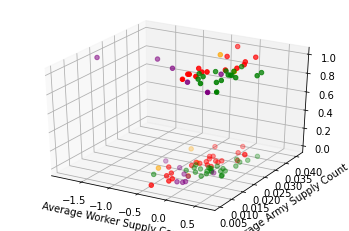

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# [float(char) for char in score_distributions[i]]
for i in range(num_clusters):
    ax.scatter(worker_distributions[i], army_distributions[i], [float(char) for char in outcome_distributions[i]] ,c=colors[i])
#ax.scatter(np.hstack(np.array(army_distributions)), np.hstack(np.array(worker_distributions)))
plt.xlabel("Average Worker Supply Count")
plt.ylabel("Average Army Supply Count")
plt.show()